# Example of using 2D histogram for simple analysis of satellite images
**arturos@cern.ch**

In [1]:
TASImage image_1("2018-01-01-00.jpg");
UInt_t yPixels_1 = image_1.GetHeight();
UInt_t xPixels_1 = image_1.GetWidth();
UInt_t *argb_1   = image_1.GetArgbArray();

TASImage image_2("2018-01-01-03.jpg");
UInt_t yPixels_2 = image_2.GetHeight();
UInt_t xPixels_2 = image_2.GetWidth();
UInt_t *argb_2   = image_2.GetArgbArray();

In [ ]:
TH2D* h_image_1 = new TH2D("h_image_1","Satellite image of before",xPixels_1,-1,1,yPixels_1,-1,1);
TH2D* h_image_2 = new TH2D("h_image_2","Satellite image of after",xPixels_2,-1,1,yPixels_2,-1,1);

In [2]:
float entriesInPixel= 0;

for (int row=0; row<xPixels_1; ++row)
{
    for (int col=0; col<yPixels_1; ++col)
    {
        int index_1 = col*xPixels_1+row;
        int index_2 = col*xPixels_2+row;
        
        float indexvalue = float(argb_1[index_1]);
        float indexvalue = float(argb_2[index_2]);
        //float greyScale = float(argb_1[index_1]&0xff)/256;
        //float greyScale = float(argb_2[index_2]&0xff)/256;
        
        if(indexvalue > entriesInPixel)
        {
            h_image_1->SetBinContent(row+1,yPixels_1-col,indexvalue);
            h_image_2->SetBinContent(row+1,yPixels_2-col,indexvalue);
        }
    }
}


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


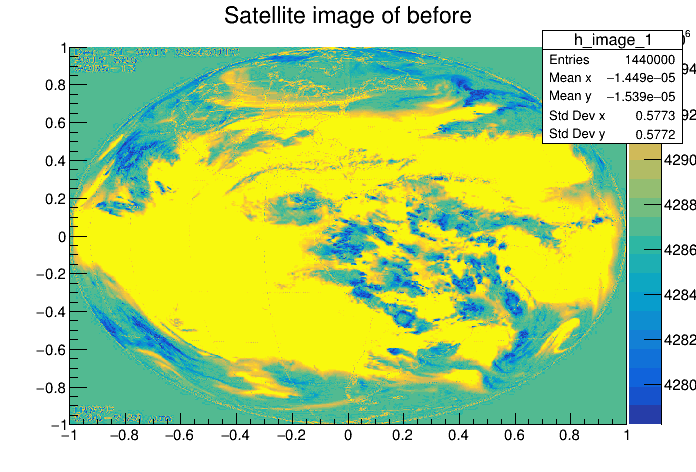

In [3]:
h_image_1->Draw("colz");
c1->Draw();

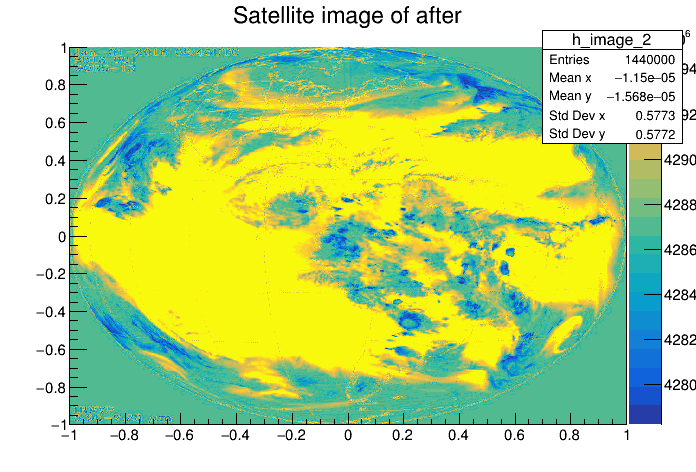

In [4]:
h_image_2->Draw("colz");
c1->Draw();

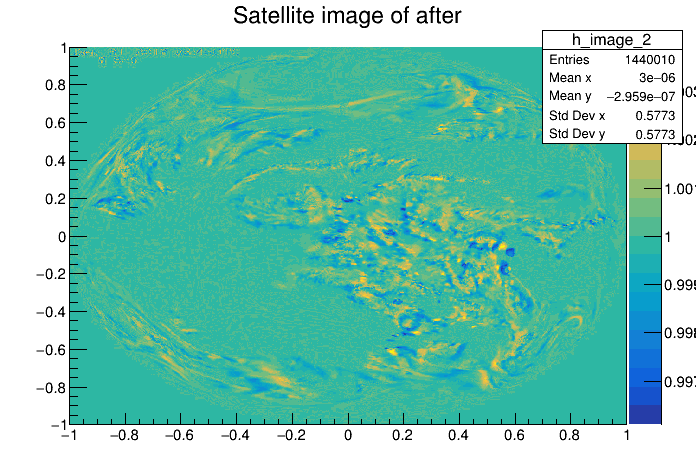

In [5]:
h_image_2->Divide(h_image_1);

h_image_2->Draw("colz");

c1->Draw();

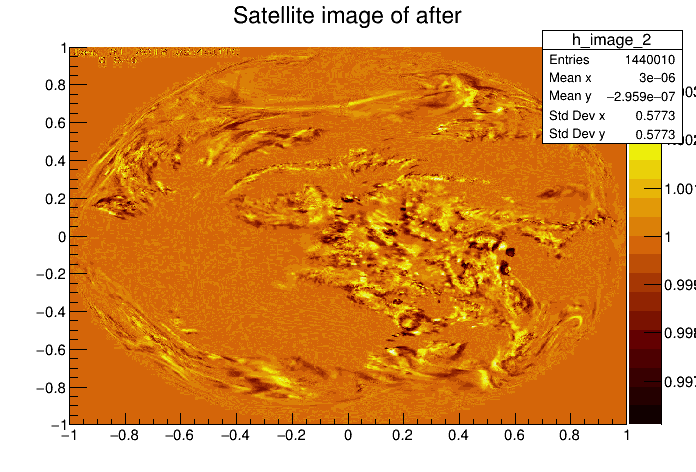

In [6]:
gStyle->SetPalette(53);
h_image_2->Draw("colz");

c1->Draw();